Load libraries

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import mpld3
import argparse

%matplotlib inline
mpld3.enable_notebook()

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from model import *

Using TensorFlow backend.
/home/gojira/anaconda3/envs/carnd/lib/python3.5/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  if d.decorator_argspec is not None), _inspect.getargspec(target))
/home/gojira/anaconda3/envs/carnd/lib/python3.5/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  if d.decorator_argspec is not None), _inspect.getargspec(target))
/home/gojira/anaconda3/envs/carnd/lib/python3.5/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  if d.decorator_argspec is not None), _inspect.getargspec(target))
/home/gojira/anaconda3/envs/carnd/lib/python3.5/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  if d

Load and explore the driving data in Pandas

In [4]:
df=pd.read_csv('data/driving_log.csv')

In [5]:
len(df)

8036

Plot the distribution of steering angles

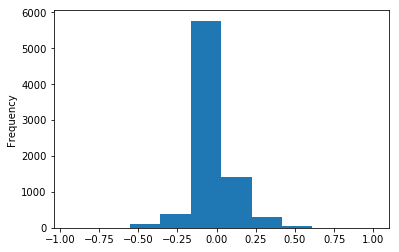

In [6]:
df['steering'].plot.hist()

Plot distribution of steering angle when filtering out values close to 0 (straight)

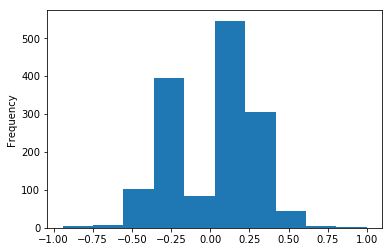

In [7]:
df[abs(df['steering']) > 0.15]['steering'].plot.hist()

Now really load the training data, getting the image files and steering angles

In [8]:
args = argparse.Namespace()

args.logfile = 'data/driving_log.csv'
args.image_directory = 'data'
args.steering_threshold = 0.15
args.steering_correction = 0.25
args.straight_steering_drop_prob = 0.8

In [9]:
image_files, steering = read_training_data(args.logfile, args.image_directory, args.steering_threshold, args.steering_threshold, args.straight_steering_drop_prob)

In [10]:
image_files

['data/IMG/center_2016_12_01_13_30_48_287.jpg',
 'data/IMG/left_2016_12_01_13_30_48_287.jpg',
 'data/IMG/right_2016_12_01_13_30_48_287.jpg',
 'data/IMG/center_2016_12_01_13_30_48_404.jpg',
 'data/IMG/left_2016_12_01_13_30_48_404.jpg',
 'data/IMG/right_2016_12_01_13_30_48_404.jpg',
 'data/IMG/center_2016_12_01_13_31_13_037.jpg',
 'data/IMG/left_2016_12_01_13_31_13_037.jpg',
 'data/IMG/right_2016_12_01_13_31_13_037.jpg',
 'data/IMG/center_2016_12_01_13_31_13_786.jpg',
 'data/IMG/left_2016_12_01_13_31_13_786.jpg',
 'data/IMG/right_2016_12_01_13_31_13_786.jpg',
 'data/IMG/center_2016_12_01_13_31_14_194.jpg',
 'data/IMG/left_2016_12_01_13_31_14_194.jpg',
 'data/IMG/right_2016_12_01_13_31_14_194.jpg',
 'data/IMG/center_2016_12_01_13_31_14_500.jpg',
 'data/IMG/left_2016_12_01_13_31_14_500.jpg',
 'data/IMG/right_2016_12_01_13_31_14_500.jpg',
 'data/IMG/center_2016_12_01_13_32_39_212.jpg',
 'data/IMG/left_2016_12_01_13_32_39_212.jpg',
 'data/IMG/right_2016_12_01_13_32_39_212.jpg',
 'data/IMG/ce

(array([   11.,    33.,   313.,  1027.,  3293.,  2345.,  1140.,   180.,
           15.,     4.]),
 array([-1.0926954 , -0.86842586, -0.64415632, -0.41988678, -0.19561724,
         0.0286523 ,  0.25292184,  0.47719138,  0.70146092,  0.92573046,
         1.15      ]),
 <a list of 10 Patch objects>)

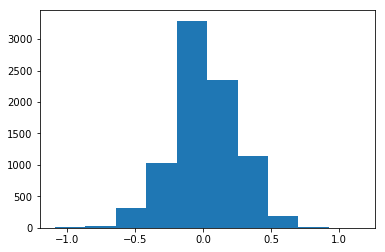

In [11]:
plt.hist(steering)

Set metadata for training run and train the model

Training Samples: 6688
Validation Samples: 1673
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 36, 158, 24)       1824      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 77, 36)        21636     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 37, 48)         43248     
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 37, 48)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 35, 64)         27712     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 2, 33, 64)         36928     
_________________________________________________________________
dropout_2 (Dropout)         

/home/gojira/anaconda3/envs/carnd/lib/python3.5/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  if d.decorator_argspec is not None), _inspect.getargspec(target))
/home/gojira/anaconda3/envs/carnd/lib/python3.5/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  if d.decorator_argspec is not None), _inspect.getargspec(target))
/home/gojira/anaconda3/envs/carnd/lib/python3.5/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  if d.decorator_argspec is not None), _inspect.getargspec(target))
/home/gojira/anaconda3/envs/carnd/lib/python3.5/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  if d.decorator_argspec is not 

Epoch 1/10
209/209 [==============================] - 30s - loss: 0.0994 - acc: 0.0966 - val_loss: 0.0348 - val_acc: 0.1091
Epoch 2/10
209/209 [==============================] - 28s - loss: 0.0356 - acc: 0.0964 - val_loss: 0.0249 - val_acc: 0.1094
Epoch 3/10
209/209 [==============================] - 28s - loss: 0.0293 - acc: 0.0967 - val_loss: 0.0241 - val_acc: 0.1100
Epoch 4/10
209/209 [==============================] - 28s - loss: 0.0274 - acc: 0.0964 - val_loss: 0.0192 - val_acc: 0.1075
Epoch 5/10
209/209 [==============================] - 28s - loss: 0.0259 - acc: 0.0964 - val_loss: 0.0198 - val_acc: 0.1122
Epoch 6/10
209/209 [==============================] - 28s - loss: 0.0246 - acc: 0.0970 - val_loss: 0.0180 - val_acc: 0.1109
Epoch 7/10
209/209 [==============================] - 28s - loss: 0.0236 - acc: 0.0969 - val_loss: 0.0178 - val_acc: 0.1069
Epoch 8/10
209/209 [==============================] - 28s - loss: 0.0234 - acc: 0.0976 - val_loss: 0.0180 - val_acc: 0.1153
Epoch 9/

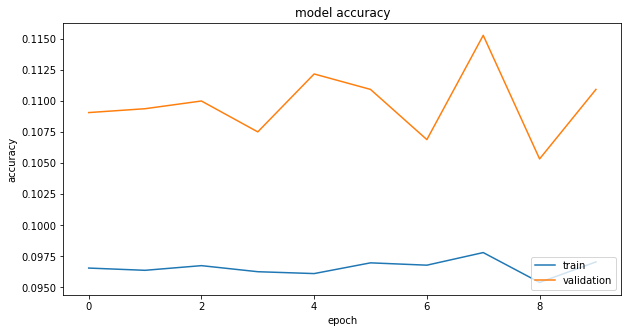

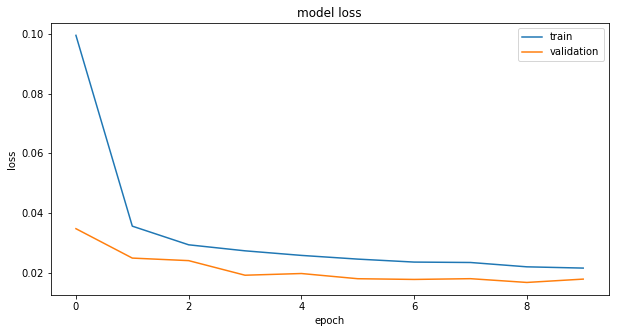

In [12]:
# Image processing params
args.crop = (60,-25,None,None)
args.resize = None

# Model architecture params
# Input height needs to be trimmed by crop amount from (160,320,3)
args.input_shape=(160 - args.crop[0] + args.crop[1], 320, 3)
args.cnn_activation='relu'

# Training params
args.epochs = 5
args.batch_size = 64
args.batch_norm = False
args.validation_split = 0.2

# Output params
args.save_directory = 'model10'

(model, history) = train_model(image_files, steering, args)
save_model_files(model, history, args)
plot_training_history(history.history)